##  *Analisis*

Infomasi Data :
1. Id : Nomor unik/nomor identitas 
2. Name : Nama dari penginapan 
3. host_id : Nomor identitas dari pendaftar data 
4. host_name : Nama dari kecamatan .
5. neighborhood : Nama kabupaten yang terdiri dari berbagai kecamatan
6. latitude : Garis melintang di antara kutub utara dan kutub selatan yang menghubungkan antara sisi timur dan barat bagian bumi
7. longitude : Garis membujur yang menghubungkan antara sisi utara dan selatan bumi
8. room_type : Tipe kamar yang disediakan oleh penginapan 
9. price : harga sewa permalam dari penginapan 
10. minimum_nights : jumlah minimum malam yang wajib disewa
11. number_of_reviews : jumlah dari review pengunjung penginapan 
12. last_review : tanggal terakhir direview 
13. reviews_per_month : Nilai rata-rata dari 
14. calculated_host_listings_count : Jumlah cantuman yang dimiliki pemilik penginapan dalam kikisan saat ini di geografi kota/wilayah
15. availability_365 : ketersediaan penginapan
16. number_of_reviews : jumlah ulasan
17. price_category : kategori harga dari penginapan
18. review_Category : kategori yang mendapatkan jumlah review

In [2]:
import numpy as np
import pandas as pd

import missingno as mno

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches
import seaborn as sns

import folium
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('Hasildata.csv')
df

,Unnamed: 0,nomor,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Price_Category,Review_Category
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2,353,0,Standar,Medium Review
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2,358,0,Standar,Low Review
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1,365,0,low,Low Review
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,1,323,1,Standar,Medium Review
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,3,365,0,Standar,Low Review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,15838,790346710454894685,Comfortable Stay in Pratunam,424281953,Saruta,Ratchathewi,13.755000,100.538530,Private room,640,1,0,4,365,0,low,Low Review
14934,15839,790404714116491557,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,13.763732,100.569455,Entire home/apt,2100,28,0,2,332,0,high,Low Review
14935,15840,790441848994752308,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,13.665395,100.603951,Entire home/apt,1400,28,0,2,364,0,Standar,Low Review
14936,15842,790458008069053319,1 Bed for 1 person Close to Chatuchak market BTS,153568635,Chutinun,Chatu Chak,13.797467,100.560550,Private room,499,5,0,3,365,0,low,Low Review


#### *Distrik yang banyak menyediakan penginapan berdasarkan tipe kamar*

In [4]:
# Melihat lokasi potensial dengan menggabungkan feature neighbourhood dan room_type lalu dilihat dari harga tertinggi 
crosstab_table = pd.crosstab(df['neighbourhood'], df['room_type'])

max_values = crosstab_table.idxmax()
value_counts = crosstab_table.sum()

result = pd.concat([max_values, value_counts], axis=1, keys=['Max Value', 'Value Counts'])

result

,Max Value,Value Counts
room_type,,
Entire home/apt,Khlong Toei,8328
Hotel room,Vadhana,614
Private room,Vadhana,5550
Shared room,Phra Nakhon,446


In [6]:
# Menghitung persentase
total_counts = result['Value Counts'].sum()
result['Percentage'] = (result['Value Counts'] / total_counts) * 100

result

,Max Value,Value Counts,Percentage
room_type,,,
Entire home/apt,Khlong Toei,8328,55.750435
Hotel room,Vadhana,614,4.110323
Private room,Vadhana,5550,37.153568
Shared room,Phra Nakhon,446,2.985674


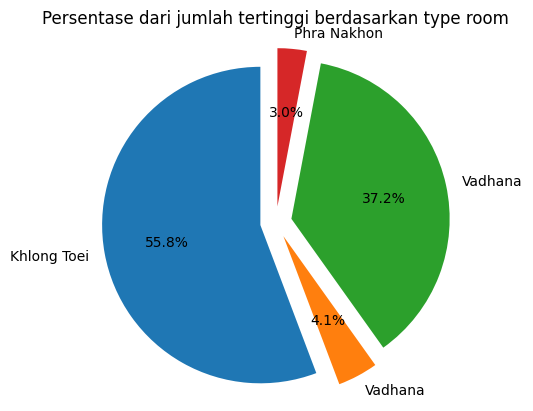

In [7]:

# Menghitung persentase
total_counts = result['Value Counts'].sum()
result['Percentage'] = (result['Value Counts'] / total_counts) * 100

# Membuat grafik pie
labels = result['Max Value']
sizes = result['Percentage']
explode = [0.1] * len(result)  

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Persentase dari jumlah tertinggi berdasarkan type room')
plt.show()



Terdapat teori mengenai pasar persaingan sempurna. Pasar persaingan sempurna yaitu dimana sebuah wilayah akan terjadi sebuah persaingan yang sempurna jika terdapat tingginya jumlah penjual dan pembeli. Hal ini sama seperti adanya pembangunan penginapan. Semakin banyak penginapan yang berada di sebuah lokasi maka akan semakin tinggi pengunjung/wisatawan yang memiliki minat untuk memilih tempat tersebut menjadi penginapannya. Semakin banyak variasi yang ada didalam sebuah penjualan tentunya akan meningkatkan minat pembeli/penyewa. 
Berdasarkan diagram pie tersebut type kamar entire home/apartemen di wilayah Khlong Toei mendominasi sehingga adanya peluang yang besar untuk bersaing. Semakin beragam bergai kamar entrie home/apartemen tentunya akan menjadi daya tarik wisatawan untuk memilih sesuai dengan kebutuhannya. Nilai presentase tertinggi type kamar entire home/apartemen di wilayah Khlong Toei yaitu mencapai 55.8% yang menandakan bahwa jumlah tertinggi pada type kamar ini sangat mendominasi. 


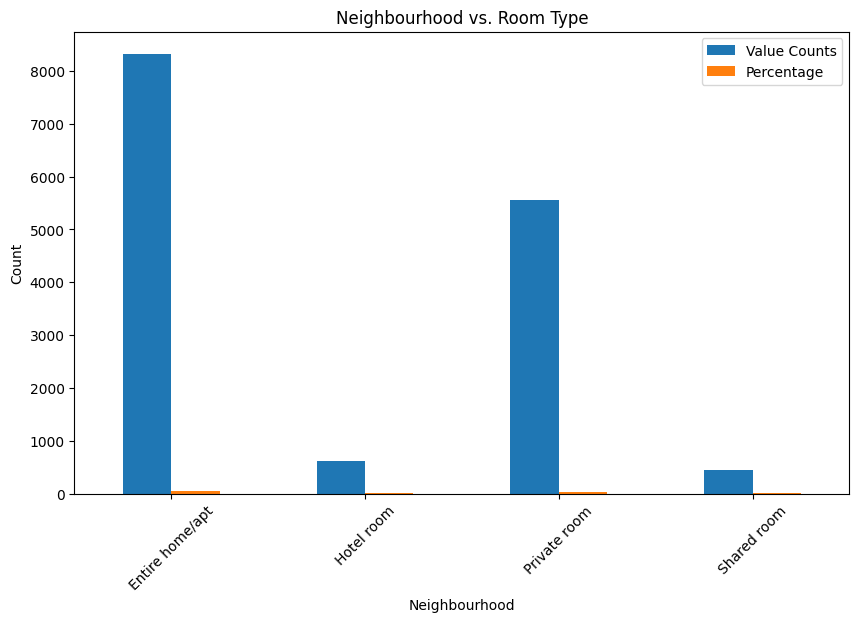

In [8]:
#membuat matploth dari type kamar
import matplotlib.pyplot as plt

result.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neighbourhood vs. Room Type')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Berdasarkan pengolahan data diatas : 
1. Type room entre home/apartemen paling banya berada di Khlong Toei dengan jumlah sebanyak 8328 unit.
Khlong Toei merupakan sebuah distrik yang berada di pusat kota.Distik ini terkenal sebagai pusat perlabuhan dan pemukiman padat penduduk. Permukiman yang padat ini tentunya memicu tumbuhnya pembangunan apartemen karena adanya keterbatasan lahan. Pembangunan apartemen yang ada tentunya digunakan untuk menfasilitasi penduduk ataupun wisatawan. 

2. Type room hotel dan privat room paling banyak berada di Vadhana dengan jumlah sebanyak 614 hotel room dan 5550 privat room. 
Vadhana atau Watthana merupakan salah satu distrik yang berada di Thailand. Distik ini pada awalnya menjadi satu dengan distik Khlong Toei namun pada 1998 distik ini memisahkan diri dengan tujuan memberikan pelayanan yang lebih baik kepada penduduknya. Distrik ini tentunya merupakan kawasan komersil di bangkok sehingga tidak heran menjadi pusat tumbuhnya hotel dan privat room. 

3. Type shared room paling banyak berada di Phra Nakhon dengan jumlah sebanyak 446 unit.Phra Nakhon merupakan salah satu distrik pusat. Distrik yang menjadi pusat dari sebuah wilayah tentunya akan akan membutuhkan adanya fasilitas penjungan salah satunya yaitu banyaknya penginapan dengan type shared room. 

#### *Distrik yang banyak menyediakan penginapan berdasarkan kategori harga*

In [9]:
data_csv = r'Hasildata.csv'  
df = pd.read_csv(data_csv)

# Menghitung jumlah price_category per neighbourhood
price_category_counts = df.groupby(['neighbourhood', 'Price_Category']).size().unstack()

# Menampilkan hasil
print(price_category_counts)


Price_Category        Standar  high  low
neighbourhood                           
Bang Bon                    3     1    1
Bang Kapi                 114    36  109
Bang Khae                  30    23   38
Bang Khen                  45    21   48
Bang Kho laen              68    39   28
Bang Khun thain             9     6    6
Bang Na                   231    74  140
Bang Phlat                 82    41   91
Bang Rak                  363   346   88
Bang Sue                  123    21   95
Bangkok Noi                60    35   51
Bangkok Yai                40    30   20
Bueng Kum                  23    16   15
Chatu Chak                294   104  143
Chom Thong                 37    16   20
Din Daeng                 216    88  133
Don Mueang                 62    21   74
Dusit                      35    17   13
Huai Khwang               520   302  191
Khan Na Yao                23     9   21
Khlong Sam Wa              12    13    7
Khlong San                187    98   71
Khlong Toei     

In [22]:
#Mengambil 5 data tertinggi berdasarkan harga tinggi
price_category_counts.nlargest(5, 'high')
price_category_counts.nlargest(5, 'high')


Price_Category,Standar,high,low
neighbourhood,,,
Vadhana,927,960,146
Khlong Toei,1066,670,198
Bang Rak,363,346,88
Ratchathewi,533,326,121
Huai Khwang,520,302,191


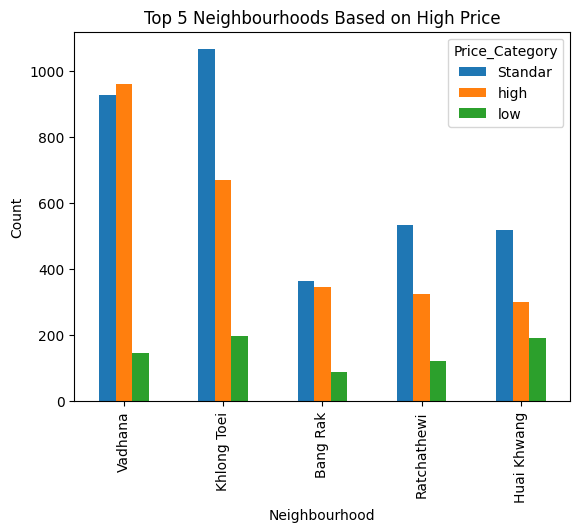

In [11]:
#Mengambil 5 data tertinggi berdasarkan harga tinggi
high_price = price_category_counts.nlargest(5, 'high')
# Menampilkan grafik batang
high_price.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 5 Neighbourhoods Based on High Price')
plt.show()

Berdasarkan grafik di atas : 
Distrik Vadhana merupakan distrik yang memiliki jumlah penginapan dengan harga-harga yang tergolong tinggi jika dibandingkan dengan lainnya. Distik lainnya dinilai cukup kurang karena harga penginapan standar dan rendah lebih tinggi jika dibandingkan dengan harga tinggi. Pada distrik Vadhana tentunya menjadi salah satu alternatif jika ingin membangun penginapan dengan harga permalam yang cukup tinggi. Pada umumnya penginapan yang memiliki harga tinggi berada di lingkungan yang memiliki fasilitas umum cukup baik sehingga akan mendukung kemudahan pengunjung hotel. 

In [26]:
#Mengambil 5 data tertinggi berdasarkan harga standar
price_category_counts.nlargest(5, 'Standar') 

Price_Category,Standar,high,low
neighbourhood,,,
Khlong Toei,1066,670,198
Vadhana,927,960,146
Ratchathewi,533,326,121
Huai Khwang,520,302,191
Sathon,409,185,120


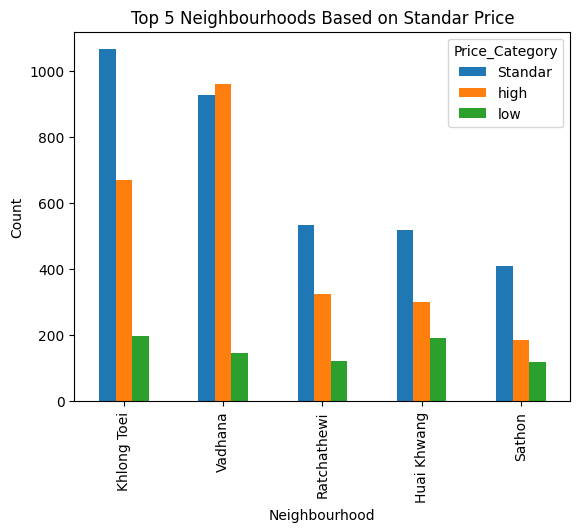

In [13]:
#Mengambil 5 data tertinggi berdasarkan harga standar
standar_price = price_category_counts.nlargest(5, 'Standar')
# Menampilkan grafik batang
standar_price.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 5 Neighbourhoods Based on Standar Price')
plt.show()

Berdasarkan grafik di atas : 
Distik Khlong Toei merupakan distik yang memiliki jumlah penginapan dengan harga standar terbanyak. Hal ini tentunya menjadi salah satu pertimbangan lokasi baru. Pada distik Khlong Toei berpotensi karena akan menyediakan berbagai variasi fasilitas namun akan mendapatkan pilihan penginapan dengan harga standar. 

In [28]:
#Mengambil 5 data tertinggi berdasarkan harga tertendah
price_category_counts.nlargest(5, 'low')

Price_Category,Standar,high,low
neighbourhood,,,
Khlong Toei,1066,670,198
Huai Khwang,520,302,191
Phra Khanong,262,84,189
Phra Nakhon,234,143,172
Vadhana,927,960,146


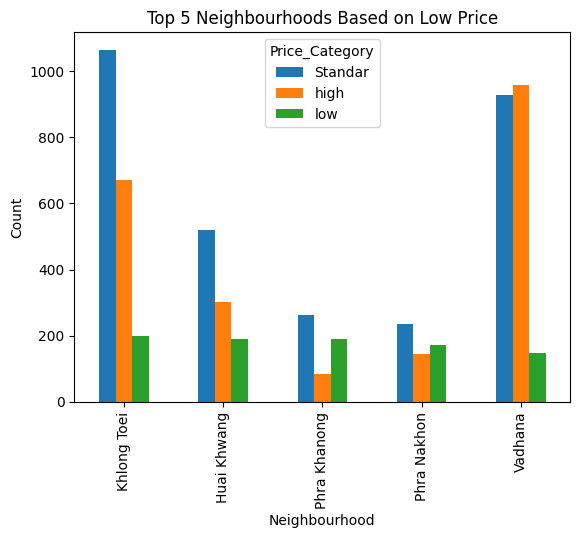

In [15]:
#Mengambil 5 data tertinggi berdasarkan harga low
low_price = price_category_counts.nlargest(5, 'low')
# Menampilkan grafik batang
low_price.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Top 5 Neighbourhoods Based on Low Price')
plt.show()

Berdasarkan grafik di atas : 
Distik yang berpotensi dalam pembangunan lokasi baru untuk penginapan dengan tipe room dengan harga yang rendah berada di Distik Phra Khanong dan Distik Phra Nakhon. Pembangunan penginapan dengan type room dengan harga yang rendah tentunya juga akan menyediakan berbagai fasilitas pendukung pada distrik tersebut. Pembangunan penginapan yang ada juga dipengaruhi adanya fasilitas umum yang tersedia. 

#### *Distrik yang menyediakan penginapan yang banyak diminati oleh penyewa dengan rate tertinggi*

In [16]:
#Melihat penginapan tersebut sudah dalam keadaan dipesan atau belum
#Nilai availability_365 maka menunjukan bahwa penginapan tersebut telah dipesan sepenuhnya
Pemesanan_df = df.copy()
Pemesanan_df["Pemesanan_rate"] = (365 - Pemesanan_df["availability_365"])/365 *100

In [17]:
#Melihat distribusi data 
df["availability_365"].describe()

count    14938.000000
mean       243.872272
std        125.506434
min          0.000000
25%        136.000000
50%        307.000000
75%        360.000000
max        365.000000
Name: availability_365, dtype: float64

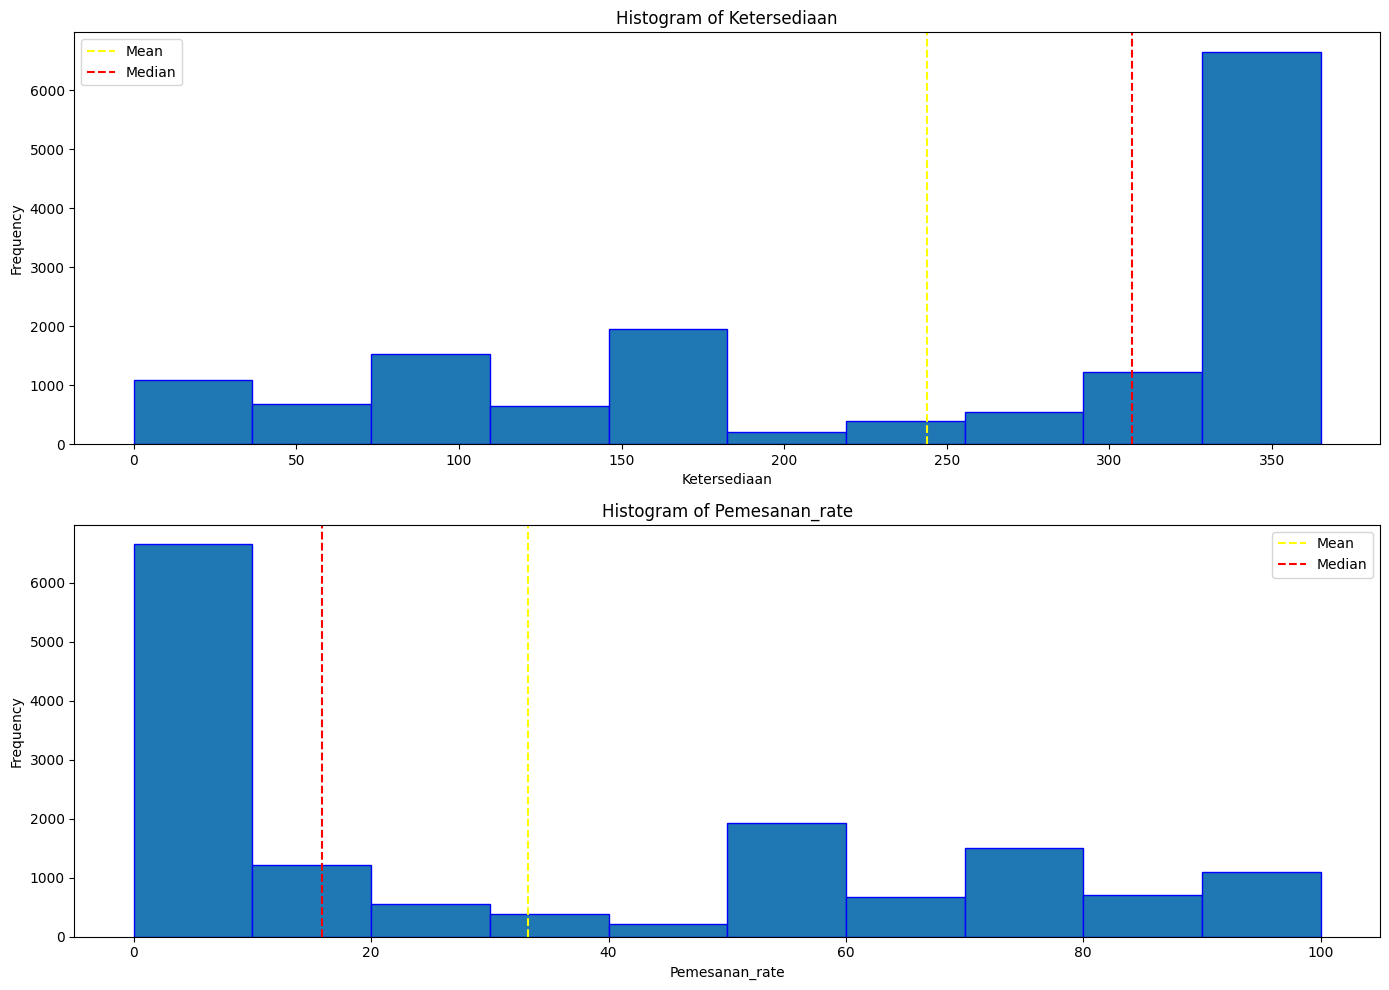

In [18]:
#Distribusi Data 
Ketersediaan = df["availability_365"]
Pemesanan_rate = Pemesanan_df["Pemesanan_rate"]
variables = [("Ketersediaan", Ketersediaan), ("Pemesanan_rate", Pemesanan_rate)]

fig, axes = plt.subplots(2, figsize=(14, 10))
axes = axes.flatten()

for i, (variable_name, data) in enumerate(variables):
            # Histogram
            axes[i].hist(data, bins=10, edgecolor='b')
            axes[i].set_xlabel(variable_name)
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'Histogram of {variable_name}')
            axes[i].axvline(data.mean(), color='yellow', linestyle='--', label='Mean')
            axes[i].axvline(data.median(), color='red', linestyle='--', label='Median')
            axes[i].legend()

plt.tight_layout()
plt.show()

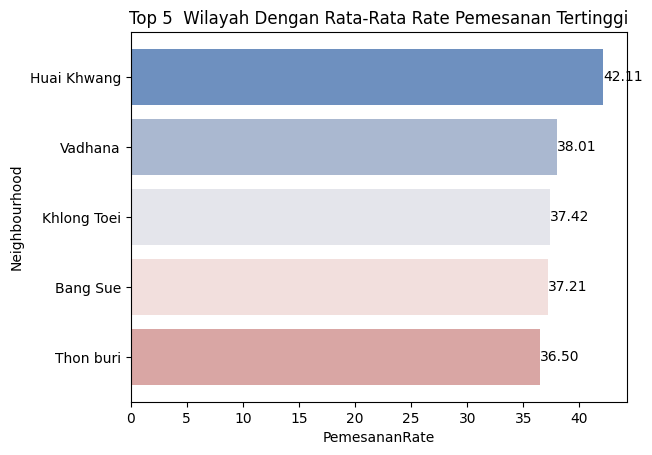

In [19]:
Pemesanan_rate_neighbourhood = Pemesanan_df.groupby("neighbourhood")["Pemesanan_rate"].mean().reset_index()
proporsi = (Pemesanan_df['neighbourhood'].value_counts() / len(Pemesanan_df)).reset_index()
proporsi.columns = ["neighbourhood", "proportion"]
rasio = pd.merge(Pemesanan_rate_neighbourhood[["Pemesanan_rate", "neighbourhood"]], proporsi[["proportion", "neighbourhood"]], on='neighbourhood')
rasio["rasio_total"] = (rasio.Pemesanan_rate/ rasio.proportion)
rasio['concat_label'] = rasio['neighbourhood']

for i in range(len(rasio)):
    if rasio.loc[i, 'concat_label'] != '':
        concat_label = rasio.loc[i, 'concat_label']
        for j in range(i + 1, len(rasio)):
            if rasio.loc[j, 'concat_label'] != '':
                diff = abs(rasio.loc[i, 'Pemesanan_rate'] - rasio.loc[j, 'Pemesanan_rate'])
                if diff <= 0.1:
                    concat_label += ' + ' + rasio.loc[j, 'neighbourhood']
                    rasio.at[j, 'concat_label'] = ''
        rasio.at[i, 'concat_label'] = concat_label

rasio = rasio[rasio['concat_label'] != '']
rasio_sorted_1 = rasio.sort_values('Pemesanan_rate', ascending=False).head(5) 

plt.barh(rasio_sorted_1['concat_label'], rasio_sorted_1['Pemesanan_rate'], color=sns.color_palette("vlag"))
plt.xlabel('PemesananRate')
plt.ylabel('Neighbourhood')
plt.title('Top 5  Wilayah Dengan Rata-Rata Rate Pemesanan Tertinggi')
plt.gca().invert_yaxis()

for i, Pemesanan_rate in enumerate(rasio_sorted_1['Pemesanan_rate']):
    plt.text(Pemesanan_rate, i, f"{Pemesanan_rate:.2f}", ha='left', va='center')

plt.show()

Berdasarkan pengolahan data di atas: 
Diperoleh 5 wilayah yang memiliki jumlah permintaan penginapan berdasarkan ketresediaan pemesanan yang ada yaitu berada di Huai Khawang, Vadhana, Khlong Toei, Bang Sue dan Thon Buri. Pada dasarnya distrik ini berada di kawasan perkotaan.  Distik Huang khwang merupakan distrik tertinggin yang jumlah permintaan pemesanan cukup tinggi.Distrik Huang khwang merupakan distrik yang berada di pusat kota dan memiliki lokasi secara geografis sangat strategis. Lokasi yang strategis ini tentunya akan menguntungkan bagi penginap untuk melakukan mobilitas. 

### *Kesimpulan* 

1. Berdasarkan tipe kamar Enite home/apartemen jumlah tertinggi berada pada distrik Khlong Toei, tipe kamar hotel room dan private room berada di distrik Vadhana dan tipe kamar shared room berada di distrik Phra Nakhon. 
2. Berdasarkan kategori harga high rekomendasi pembangunan penginapan baru berada di distrik Vadhana, kategori harga standar rekomendasi pembangunan penginapan baru berada di distrik Khlong Toei, dan berdasarkan kategori harga low rekomendasi pembangunan penginapan baru berada di distrik Phra Khanong dan Phra Nakhon
3. Distrik yang menyediakan penginapan yang banyak diminati oleh penyewa dengan rate tertinggi yaitu berada di distrik Huai Khawang, Vadhana, Khlong Toei, Bang Sue dan Thon Buri.

### *Rekomendasi*

Pada dasarnya pembangunan penginapan dapat menggunakan adanya teori pasar persaingan sempurna. Teori ini menjelaskan bahwa adanya ketersediaan penjualan yang tinggi maka akan berdampak pada tingginya jumlah konsumsi atau tingginya konsumen. Berdasarkan pengolahan data yang menitikberatkan pada tipe kamar penginapan, harga dan banyaknya perimtaan dapat disimpulkan yang memiliki peluang untuk bersaing sebagai penginapan baru yakni berada di distrik Vadhana. Hal ini disebabkan karena cukup banyaknya tipe hotel room dan private room yang ada, banyaknya penginapan hotel dengan harga yang cukup tinggi dan adanya pemesanan yang cukup tinggi di wilayah distrik tersebut. Pembangunan penginapan baru ini tentunya diharapkan dapat bersaing dengan penginapan-penginapan yang sudah ada sebelumnya. Penginapan baru akan menjadi perhatian baru di lokasi tersebut. 